In [1]:
from itertools import product
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
snapshot_parent_dir = "/scratch/gpfs/jp7427/fvhoe/snapshots/"


def load_double_mach_solution(
    T: float, Nx: int, p: int, NAD: float, SED: bool, CFL: float, integrator_order: int
):
    project_name = (
        f"double-mach-reflection_{Nx=}_{p=}_{NAD=}_{SED=}_{CFL=}_{integrator_order=}"
    )
    solver = EulerSolver()
    solver.rkorder(T, snapshot_dir=snapshot_parent_dir + project_name)
    return solver

Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/double-mach-reflection_Nx=960_p=4_NAD=0.001_SED=True_CFL=0.8_integrator_order=3
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'
Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/double-mach-reflection_Nx=960_p=4_NAD=0.001_SED=True_CFL=0.1_integrator_order=3
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'
Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/double-mach-reflection_Nx=960_p=4_NAD=0.008_SED=True_CFL=0.8_integrator_order=3
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'
Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/double-mach-reflection_Nx=960_p=4_NAD=0.008_SED=True_CFL=0.1_

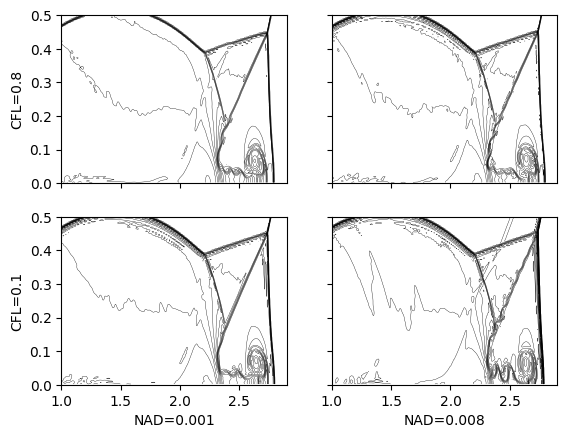

In [5]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

for (j, NAD), (i, CFL) in product(enumerate([0.001, 0.008]), enumerate([0.8, 0.1])):
    solver = load_double_mach_solution(
        T=0.2, Nx=960, p=4, NAD=NAD, SED=True, CFL=CFL, integrator_order=3
    )
    solver.plot_2d_slice(
        ax[i, j],
        param="rho",
        z=0.5,
        contour=True,
        levels=np.linspace(1.5, 22.9705, 30),
        colors="k",
        linewidths=0.25,
    )
    ax[i, 0].set_ylabel(f"{CFL=}")
    ax[1, j].set_xlabel(f"{NAD=}")

    ax[i, j].set_xlim(1, 2.9)
    ax[i, j].set_ylim(0, 0.5)

fig.savefig("../../double_mach_C_NAD.png", dpi=300)